#                                 Gradient Descent models Implementation
                               by
                       Mani Sankar (MIT2019055)
                        Ramprasad (MIT2019115)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


train_data = pd.read_csv('/home/ram/data_sets/USA_Housing.csv')
X = train_data[['Avg. Area Income',  'Avg. Area Number of Rooms', 
               'Avg. Area Number of Bedrooms', 'Area Population']]
X0 = np.ones(len(train_data)) # constant vector for intecept
X.insert(0, "X0", X0, True) 
M = int(len(X)) 
no_of_features = len(X.columns)
X = X.values.reshape(M, no_of_features)
Y = np.array(train_data['House Price']).reshape(M, 1)

# Linear Regression 

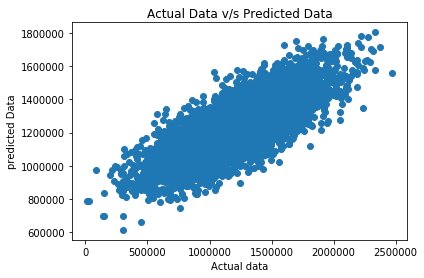

Accuracy:  49.485779456353576


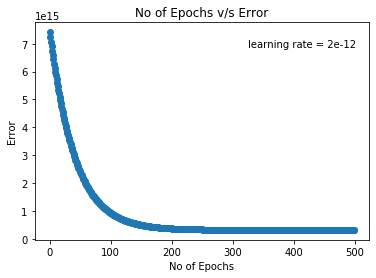

In [5]:
np.random.seed(124) 
W = np.random.rand(no_of_features, 1) # weights vector

a = 2e-12  # learning rate
epochs = 500 #number of epoches

error  = []

# Gradient Descent 
for i in range(epochs): 
    Yi = np.matmul(X , W)
    Deriv_W = (-1/M) * np.matmul((np.subtract(Y, Yi).reshape(1, M)), X) 
    W= np.subtract(W, a * Deriv_W.reshape(no_of_features, 1)) 
    error.append(np.sum(np.subtract(Y, Yi) **2) )
Yi = np.matmul(X , W)
W1 = W
plt.scatter(Y, Yi)
plt.title('Actual Data v/s Predicted Data')
plt.xlabel("Actual data")
plt.ylabel("predicted Data")
plt.show()

from sklearn.metrics import r2_score
print("Accuracy: ",float(r2_score(Y, Yi)) * 100, end='\n')

plt.scatter(range(epochs), error)
plt.title("No of Epochs v/s Error")
plt.xlabel("No of Epochs")
plt.ylabel("Error")
plt.text(0.8, 0.9,'learning rate = '+str(a),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.show()



# Ridge Regressin

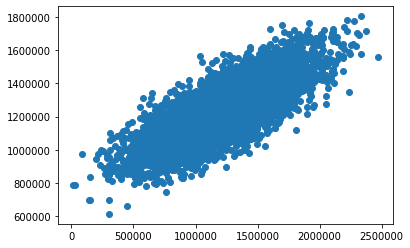

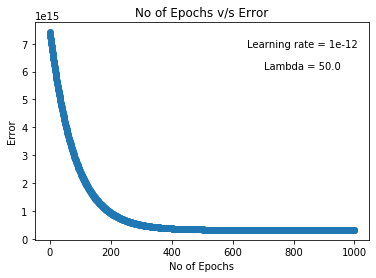

Accuracy:  49.48557782521051


In [389]:
np.random.seed(124) 
W = np.random.rand(no_of_features,1) # weights vector

a = 1e-12 # learning rate
lamda = 5e1
epochs = 1000 #number of epoches

error  = []

# Gradient Descent 
for i in range(epochs): 
    Yi = np.matmul(X , W)
    Deriv_W = (-1/M) * np.matmul((np.subtract(Y, Yi).reshape(1, M)), X)
    Deriv_W += ((lamda/M ) * W).reshape(1, no_of_features)
    Deriv_W[0][0] -= (lamda/M ) * W[0][0]
    W= np.subtract(W, a * Deriv_W.reshape(no_of_features, 1)) 
    error.append(np.sum(np.subtract(Y, Yi) **2) )
Yi = np.matmul(X , W)
W2 = W
plt.scatter(Y, Yi)
plt.show()

plt.scatter(range(epochs), error)
plt.title("No of Epochs v/s Error")
plt.xlabel("No of Epochs")
plt.ylabel("Error")
plt.text(0.8, 0.9,'Learning rate = '+str(a),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.text(0.8,0.8,'Lambda = '+ str(lamda),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.show()

print("Accuracy: ",float(r2_score(Y, Yi)) * 100, end='\n')

# Lasso Regression

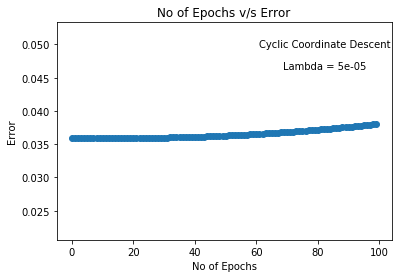

Accuracy:  49.88338446481957


In [510]:
train_data = pd.read_csv('/home/ram/data_sets/USA_Housing.csv')
X = train_data[['Avg. Area Income',  'Avg. Area Number of Rooms', 
               'Avg. Area Number of Bedrooms', 'Area Population']]
X0 = np.ones(len(train_data)) # constant vector for intecept
X.insert(0, "X0", X0, True) 
M = int(len(X)) 
no_of_features = len(X.columns)
X = X.values.reshape(M, no_of_features)
Y = np.array(train_data['House Price']).reshape(M, 1)

# ls_W = np.random.rand(no_of_features,1) # weights vector
ls_W = np.array([[0.68445164],
 [0.86840721],
 [0.03080735],
 [0.2239114 ],
 [0.68971733]])
lamda = 5e-5
epochs = 100
error = []
norms_x = np.linalg.norm(X, axis=0)
X_norm = X/norms_x
norms_y = np.linalg.norm(Y, axis=0)
Y_norm = Y / norms_y
x_r = X_norm.reshape(no_of_features,M)

for j in range(epochs):
    for i in range(no_of_features):
        new_w = 0
        Yi = np.dot( X_norm, ls_W)
        for k in range(i+1):
            x_i = x_r[k].reshape(M, 1)
            ro = np.dot(x_r[k], np.add( np.subtract(Y_norm, Yi) ,x_i*ls_W[k][0] ))
            if k == 0:
                new_w = ro
            elif ro < -lamda/2:
                new_w = ro + lamda/2
            elif ro > lamda/2:
                new_w = ro - lamda/2
            else:
                new_w = 0
        ls_W[i][0] = new_w
    Yi = np.matmul(X_norm , ls_W)
    error.append(sum((Y_norm - Yi) **2)) 
#     print((Y_norm - Yi))
        

Yi = np.matmul(X_norm , ls_W)
# plt.scatter(Y_norm * norms_y, Yi * norms_y)
# plt.show()

plt.scatter(range(epochs), error)
plt.title("No of Epochs v/s Error")
plt.xlabel("No of Epochs")
plt.ylabel("Error")
plt.text(0.8, 0.9,'Cyclic Coordinate Descent',horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.text(0.8,0.8,'Lambda = '+ str(lamda),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.show()

print("Accuracy: ",float(r2_score(Y_norm * norms_y, Yi * norms_y)) * 100, end='\n')

# Stocastic Regression 

In [7]:
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = M // batch_size
    for i in range(n_minibatches): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches

# Mini Batch with Linera regression

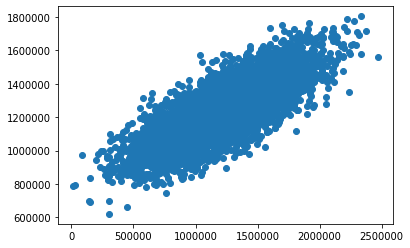

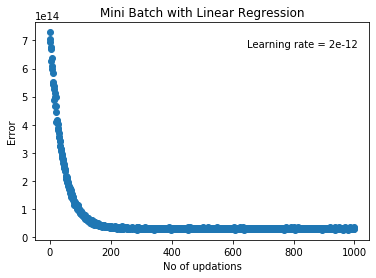

Accuracy:  49.57165058671878


In [8]:
np.random.seed(124) 
W = np.random.rand(no_of_features, 1) # weights vector

a = 0.000000000002  # learning rate
epochs = 100 #number of epoches
error  = []

batch_size = 500

# Gradient Descent 
for i in range(epochs):
    for batch in create_mini_batches(X, Y, batch_size):
        x_mini, y_mini = batch
        Yi = np.matmul(x_mini , W)
        Deriv_W = (-1/batch_size) * np.matmul((np.subtract(y_mini, Yi).reshape(1, batch_size)), x_mini) 
        W= np.subtract(W, a * Deriv_W.reshape(no_of_features, 1)) 
        Yi = np.matmul(x_mini , W)
        error.append(np.sum(np.subtract(y_mini, Yi) **2) )
    
W1 = W
Yi = np.matmul(X , W)
plt.scatter(Y, Yi)
plt.show()

plt.scatter(range(len(error)), error)
plt.title("Mini Batch with Linear Regression")
plt.xlabel("No of updations")
plt.ylabel("Error")
plt.text(0.8, 0.9,'Learning rate = '+ str(a),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.show()

print("Accuracy: ",float(r2_score(Y, Yi)) * 100, end='\n')


# Stocastic Gradient Descent with Linear regression

In [542]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


train_data = pd.read_csv('/home/ram/data_sets/USA_Housing.csv')
X = train_data[['Avg. Area Income',  'Avg. Area Number of Rooms', 
               'Avg. Area Number of Bedrooms', 'Area Population']]
X0 = np.ones(len(train_data)) # constant vector for intecept
X.insert(0, "X0", X0, True) 
M = int(len(X)) 
no_of_features = len(X.columns)
X = X.values.reshape(M, no_of_features)
Y = np.array(train_data['House Price']).reshape(M, 1)

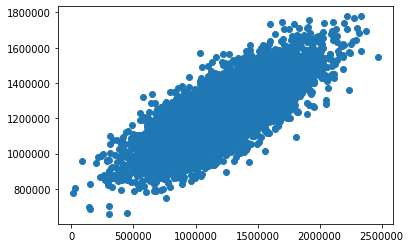

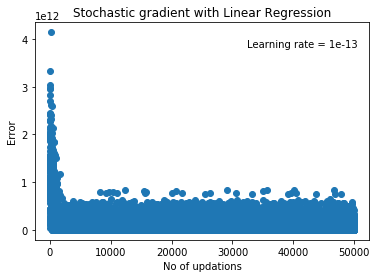

Accuracy:  49.83565737865759


In [601]:


np.random.seed(124) 
W = np.random.rand(no_of_features, 1) # weights vector

a = 0.0000000000001  # learning rate
epochs = 10 #number of epoches
error  = []

batch_size = 1

# Gradient Descent 
for i in range(epochs):
    for batch in create_mini_batches(X, Y, batch_size):
        x_mini, y_mini = batch
        Yi = np.matmul(x_mini , W)
        Deriv_W = (-2/batch_size) * np.matmul((np.subtract(y_mini, Yi).reshape(1, batch_size)), x_mini) 
        W= np.subtract(W, a * Deriv_W.reshape(no_of_features, 1)) 
        Yi = np.matmul(x_mini , W)
        error.append(np.sum(np.subtract(y_mini, Yi) **2) )
    
W1 = W
Yi = np.matmul(X , W)
plt.scatter(Y, Yi)
plt.show()

plt.scatter(range(len(error)), error)
plt.title("Stochastic gradient with Linear Regression")
plt.xlabel("No of updations")
plt.ylabel("Error")
plt.text(0.8, 0.9,'Learning rate = '+ str(a),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.show()

print("Accuracy: ",float(r2_score(Y, Yi)) * 100, end='\n')

# Mini Batch with Ridge regression

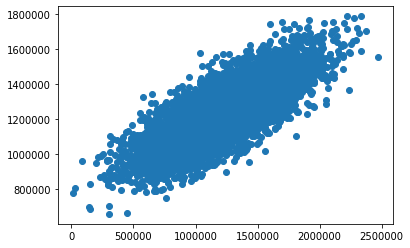

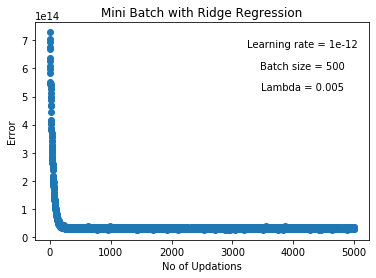

Accuracy:  49.856544602095596


In [572]:
np.random.seed(124) 
W = np.random.rand(no_of_features, 1) # weights vector

a = 0.000000000001  # learning rate
epochs = 500 #number of epoches
error  = []
lamda = 5e-3
batch_size = 500

# Gradient Descent 
for i in range(epochs):
    for batch in create_mini_batches(X, Y, batch_size):
        x_mini, y_mini = batch
        Yi = np.matmul(x_mini , W)
        Deriv_W = (-2/batch_size) * np.matmul((np.subtract(y_mini, Yi).reshape(1, batch_size)), x_mini) 
        Deriv_W += ((lamda/batch_size ) * W).reshape(1, no_of_features)
        Deriv_W[0][0] -= (lamda/batch_size ) * W[0][0]
        W= np.subtract(W, a * Deriv_W.reshape(no_of_features, 1)) 
        Yi = np.matmul(x_mini , W)
        error.append(np.sum(np.subtract(y_mini, Yi) **2) )
    
Yi = np.matmul(X , W)
plt.scatter(Y, Yi)
plt.show()

plt.scatter(range(len(error)), error)
plt.title("Mini Batch with Ridge Regression")
plt.xlabel("No of Updations")
plt.ylabel("Error")
plt.text(0.8, 0.9,'Learning rate = '+ str(a),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.text(0.8, 0.8,'Batch size = '+ str(batch_size),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.text(0.8, 0.7,'Lambda = '+ str(lamda),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.show()


from sklearn.metrics import r2_score
print("Accuracy: ",float(r2_score(Y, Yi)) * 100, end='\n')




# Stocastic Gradient with Ridge model

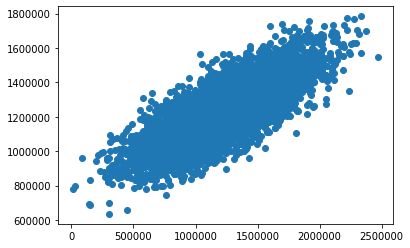

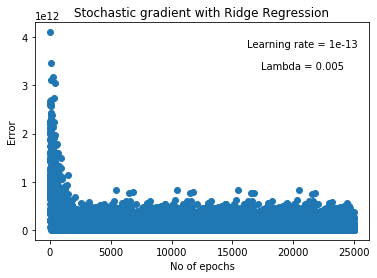

Accuracy:  49.67819943909976


In [597]:
np.random.seed(124) 
W = np.random.rand(no_of_features, 1) # weights vector

a = 0.0000000000001  # learning rate
epochs = 5 #number of epoches
lamda = 5e-3
error  = []
batch_size = 1
# Gradient Descent 
for i in range(epochs):
    for batch in np.hstack((X,Y)):
        x, y = batch[:no_of_features].reshape(1, no_of_features), batch[no_of_features:]
        Yi = np.matmul(x , W)
        Deriv_W = (-2/batch_size) * np.matmul((np.subtract(y, Yi).reshape(1, batch_size)), x) 
        Deriv_W += ((lamda/batch_size ) * W).reshape(1, no_of_features)
        Deriv_W[0][0] -= (lamda/batch_size ) * W[0][0]
        W= np.subtract(W, a * Deriv_W.reshape(no_of_features, 1)) 
        Yi = np.matmul(x , W)
        error.append(np.sum(np.subtract(y, Yi) **2) )
    
W1 = W
Yi = np.matmul(X , W)
plt.scatter(Y, Yi)
plt.show()

plt.scatter(range(len(error)), error)
plt.title("Stochastic gradient with Ridge Regression")
plt.xlabel("No of epochs")
plt.ylabel("Error")
plt.text(0.8, 0.9,'Learning rate = '+ str(a),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.text(0.8, 0.8,'Lambda = '+ str(lamda),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.show()

print("Accuracy: ",float(r2_score(Y, Yi)) * 100, end='\n')





